In [1]:
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

yolo = cv2.dnn.readNet('C:/Users/laksh/Desktop/VScode/Python/proj/yolo/yolov3-tiny.weights',
                       'C:/Users/laksh/Desktop/VScode/Python/proj/yolo/yolov3-tiny.cfg')

In [2]:
classes = []

with open("C:/Users/laksh/Desktop/VScode/Python/proj/yolo/coco.names", 'r') as f:
    classes = f.read().splitlines()

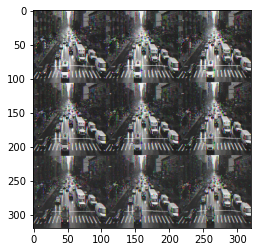

In [3]:
img = cv2.imread('img.jpg')

blob = cv2.dnn.blobFromImage(
    img, 1/255, (320, 320), (0, 0, 0), swapRB=True, crop=False)

i = blob[0].reshape(320, 320, 3)
plt.imshow(i)


In [4]:
yolo.setInput(blob)

In [5]:
output_layers_name  = yolo.getUnconnectedOutLayersNames()
layeroutput =  yolo.forward(output_layers_name)

In [ ]:
boxes = []
confidence = []
class_ids = []

for output in layeroutput:
    for detection in output:
        score = detection[:]
        class_ids = np.argmax(score)
        confidence = score[class_ids]

        if confidence>0.7:
            center_x = int(detection[0]*width)
    
            center_x = int(detection[0]*height) 